# Visualização dos dados

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/Mall_Customers.csv', engine='python', on_bad_lines='skip')
dataset.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 1. Visualize o scatteplot em matriz com hue = “Gender”. Dá para notar alguma diferença? Se sim, qual e por quê?


Gender
Female    112
Male       88
Name: count, dtype: int64


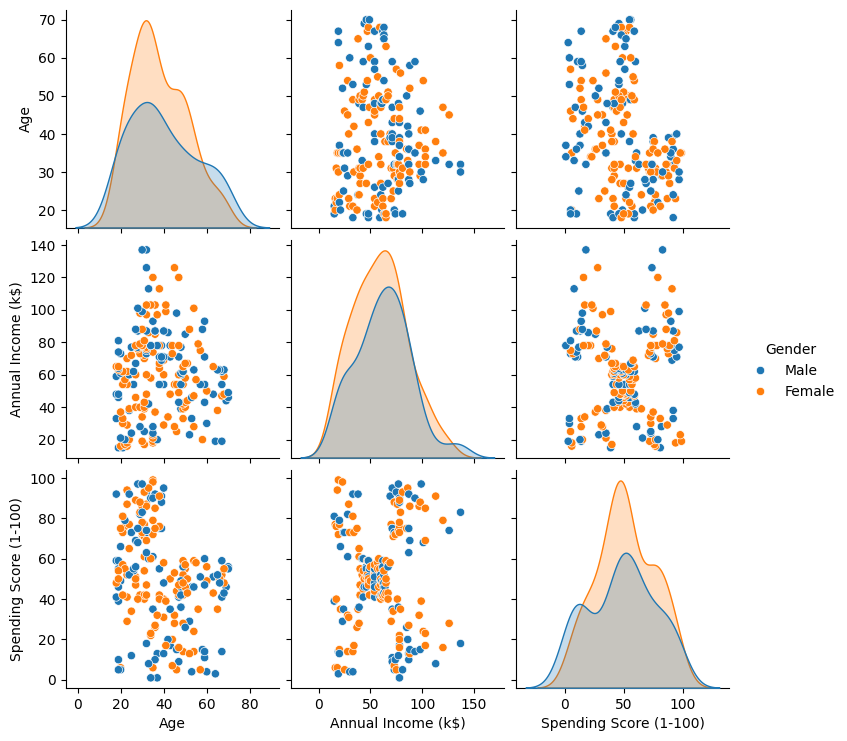

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

datasetSemID = dataset.drop(columns=['CustomerID'])

contagem = dataset['Gender'].value_counts()
print(contagem)

sns.pairplot(datasetSemID, hue='Gender')
plt.show()

Não é posssível notar nenhum diferença notável nos gráficos de dispersão. Já nos gráficos de densidade como o Spending Score, é possível ver que as mulheres costumam gastar mais.

## 2. Crie um DataFrame apenas com colunas Annual Income e Spending Score.


    Annual Income (k$)  Spending Score (1-100)
0                   15                      39
1                   15                      81
2                   16                       6
3                   16                      77
4                   17                      40
5                   17                      76
6                   18                       6
7                   18                      94
8                   19                       3
9                   19                      72
10                  19                      14
11                  19                      99
12                  20                      15
13                  20                      77
14                  20                      13
15                  20                      79
16                  21                      35
17                  21                      66
18                  23                      29
19                  23                      98


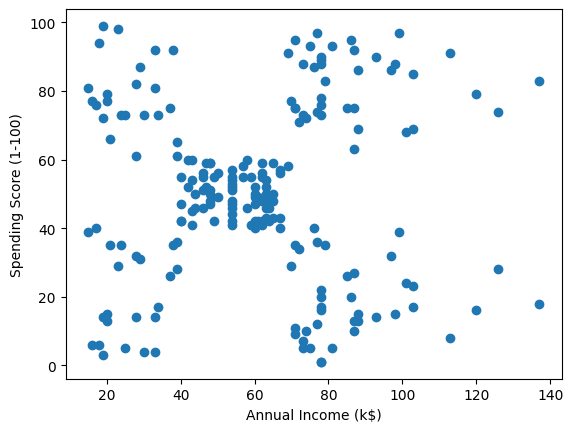

In [32]:
AnnualIcome_SpendingScore = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
print(AnnualIcome_SpendingScore.head(20))

fig, ax = plt.subplots()
ax.scatter(AnnualIcome_SpendingScore['Annual Income (k$)'], AnnualIcome_SpendingScore['Spending Score (1-100)'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()

## 3. Import o K-means.


In [33]:
from sklearn.cluster import KMeans

## 4. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters.


Inercia do modelo: 25477.95576941595
O silhouette score médio é: 0.4764056304925199 



<ipython-input-35-f2589b6c5851>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AnnualIcome_SpendingScore['Cluster'] = kmean.fit_predict(AnnualIcome_SpendingScore)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

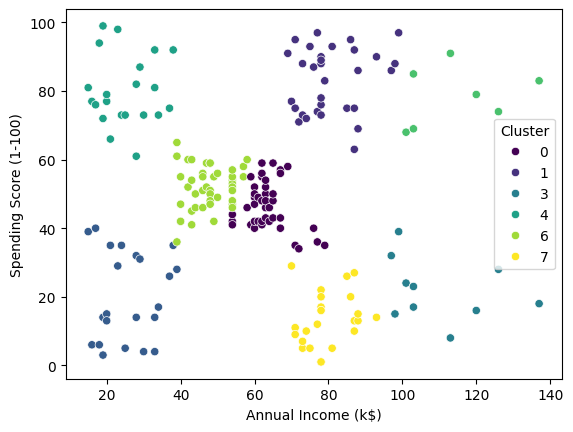

In [35]:
from enum import auto
from sklearn.metrics import silhouette_score
import seaborn as sns

kmean = KMeans(random_state=0, n_init='auto').fit(AnnualIcome_SpendingScore)
AnnualIcome_SpendingScore['Cluster'] = kmean.fit_predict(AnnualIcome_SpendingScore)

labels = AnnualIcome_SpendingScore['Cluster']
silhouette_avg = silhouette_score(AnnualIcome_SpendingScore, labels)

print(f'Inercia do modelo: {kmean.inertia_}')
print(f"O silhouette score médio é: {silhouette_avg} \n")

sns.scatterplot(data=AnnualIcome_SpendingScore, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')

## 5. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?

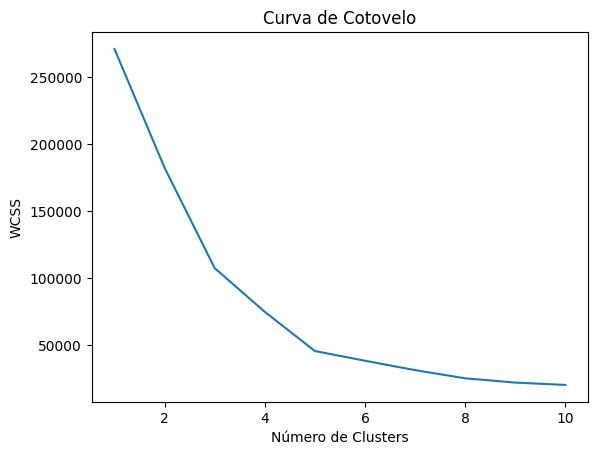

In [37]:
wcss = [] #soma das distâncias ao quadrado entre cada ponto e o centróide do cluster ao qual pertence

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(AnnualIcome_SpendingScore)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

Com base no gráfico podemos ver que o número ideal de Clusters seria 5.

## 6. Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada. Compare os resultados e comente.

Inercia do modelo: 44448.45544793369
O silhouette score é: 0.5553511832664837 



<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

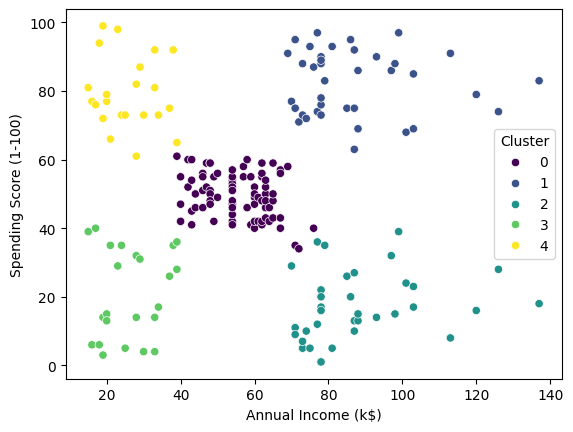

In [48]:
AnnualIcome_SpendingScore2 = AnnualIcome_SpendingScore.copy()
AnnualIcome_SpendingScore2.drop(columns=['Cluster'], inplace=True)

kmean2 = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(AnnualIcome_SpendingScore2)
AnnualIcome_SpendingScore2['Cluster'] = kmean2.fit_predict(AnnualIcome_SpendingScore2)

labels2 = AnnualIcome_SpendingScore2['Cluster']
silhouette_avg2 = silhouette_score(AnnualIcome_SpendingScore2, labels2)

print(f'Inercia do modelo: {kmean2.inertia_}')
print(f"O silhouette score é: {silhouette_avg2} \n")

sns.scatterplot(data=AnnualIcome_SpendingScore2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')

Comparando os dois resultados, vemos que o modelo com 5 clusters possui um resultado de inercia (mesmo o resultado da inercia costumar melhorar conforme aumenta o número de clusters) e silhouette score melhor.
E vendo os clusters gerados no gráfico, podemos perceber que existe um grupo com mais ocorrências, que é o grupo 0. Esse grupo possui um Renda Anual entre 40 e 70k$, e um Spending Score (pontuação de gastos) entre 40 e 60. Podemos inferir que esse grupo se trata de pessoas de classe média.

## 7. Quais foram os centroids? Imprima os centroids

In [51]:
print(kmean2.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


Matriz contendo as coordenadas dos centroids.

## 8. Mostre o gráfico do resultado com os centroids

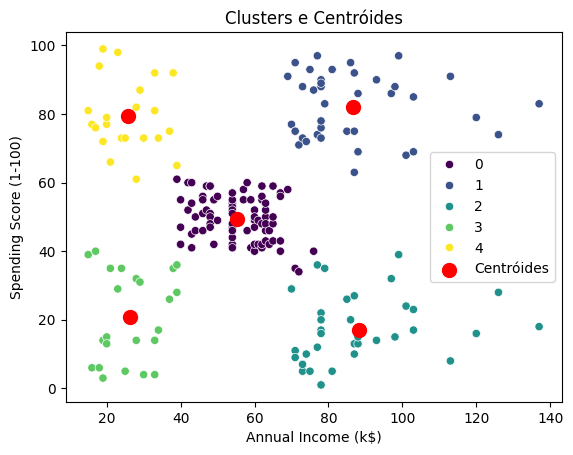

In [52]:
sns.scatterplot(data=AnnualIcome_SpendingScore2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.scatter(kmean2.cluster_centers_[:, 0], kmean2.cluster_centers_[:, 1], s=100, c='red', marker='o', label='Centróides')
plt.title('Clusters e Centróides')
plt.legend()
plt.show()

## 9. Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a campanha de marketing?

Com base nos resultados, a melhor estratégia seria direcionar a campanha de marketing para o Cluster 0. Apesar de não ser o grupo de pessoas que tem os maiores Spending Scores, é o grupo que tem a maior concentração de amostras. E por ser um grupo menos disperso, as pessoas que se encaixam nesse grupo tendem a ser mais parecidos nos seus hábitos de consumo, o que torna mais fácil criar uma campanha direcionada a esse grupo.